In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('__file__')) + '/../')
from sac14.btcusd import bitmex

dataframe = bitmex()

In [2]:
# 実際の運用モデルを考慮して、データを分ける
# train_dataframe: 運用開始前に学習するデータ
# dataframe: 運用中に取得できるデータ
train_dataframe = dataframe.head(1900)

In [3]:
from sac14.model import apply_min_max_scaler, create_dataset, create_data, create_rnn_model, create_lstm_model

look_back = 3
train_dataset = train_dataframe.values.astype('float32')
train_dataset, scaler = apply_min_max_scaler(train_dataset)
train_x, train_y = create_dataset(train_dataset, look_back)
train_x

Using TensorFlow backend.


array([[[ 0.78799868],
        [ 0.7831254 ],
        [ 0.75205612]],

       [[ 0.7831254 ],
        [ 0.75205612],
        [ 0.77246428]],

       [[ 0.75205612],
        [ 0.77246428],
        [ 0.77581501]],

       ..., 
       [[ 0.96497107],
        [ 0.97441387],
        [ 0.96497107]],

       [[ 0.97441387],
        [ 0.96497107],
        [ 0.9680171 ]],

       [[ 0.96497107],
        [ 0.9680171 ],
        [ 0.96923542]]], dtype=float32)

In [4]:
train_y

array([ 0.77246428,  0.77581501,  0.76789522, ...,  0.9680171 ,
        0.96923542,  0.97502279], dtype=float32)

In [5]:
model = create_rnn_model(look_back)
model.fit(train_x, train_y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 3s - loss: 0.0049
Epoch 2/10
 - 3s - loss: 5.5515e-04
Epoch 3/10
 - 3s - loss: 5.7988e-04
Epoch 4/10
 - 3s - loss: 5.3741e-04
Epoch 5/10
 - 3s - loss: 5.3749e-04
Epoch 6/10
 - 3s - loss: 5.3629e-04
Epoch 7/10
 - 3s - loss: 4.8899e-04
Epoch 8/10
 - 3s - loss: 5.1740e-04
Epoch 9/10
 - 3s - loss: 4.8502e-04
Epoch 10/10
 - 3s - loss: 4.9296e-04


In [6]:
# 学習データに使用した最後のインデックスから、実践データをパースする
train_last_index = train_dataframe.tail(1).index.values[0]
location = dataframe.index.get_loc(train_last_index)
train_last_index, location

(1521602700, 1899)

In [7]:
# 使用する実践データは最低 look_back 分のデータを含ませ、学習した直後でも計算に使えるようにする
future_dataframe = dataframe.iloc[location-(look_back-1):,:]
future_dataframe.shape

(120, 1)

In [8]:
future_dataframe.head(5)

,c
t,
1521602100,8944.5
1521602400,8946.5
1521602700,8956.0
1521603000,8953.0
1521603300,8954.5


In [9]:
future_dataframe.tail(5)

,c
t,
1521636600,9002.5
1521636900,9014.0
1521637200,9023.5
1521637500,9039.0
1521637800,9047.0


In [10]:
from sac14.model import create_data
import numpy as np

dataset = future_dataframe.values.astype('float32')
dataset = scaler.fit_transform(dataset)

future_range = 3
prediction_dataset = dataset
for i in range(future_range):
    data_x = create_data(prediction_dataset, look_back)[-1:]
    prediction = model.predict(data_x)
    prediction_dataset = np.append(prediction_dataset, prediction, axis=0)

dataset

array([[ 0.09443283],
       [ 0.10411453],
       [ 0.15011978],
       [ 0.13559341],
       [ 0.1428566 ],
       [ 0.20581055],
       [ 0.19612503],
       [ 0.41646576],
       [ 0.42856979],
       [ 0.46004868],
       [ 0.45036316],
       [ 0.49636841],
       [ 0.49152374],
       [ 1.        ],
       [ 0.8740921 ],
       [ 0.83293152],
       [ 0.78450394],
       [ 0.7142868 ],
       [ 0.75060654],
       [ 0.78450394],
       [ 0.68523026],
       [ 0.70217896],
       [ 0.71186447],
       [ 0.74092102],
       [ 0.7990303 ],
       [ 0.77965927],
       [ 0.81356049],
       [ 0.77481842],
       [ 0.70217896],
       [ 0.70217896],
       [ 0.7142868 ],
       [ 0.72397232],
       [ 0.55690002],
       [ 0.45036316],
       [ 0.47941971],
       [ 0.52300262],
       [ 0.54479599],
       [ 0.59564209],
       [ 0.58837891],
       [ 0.60048294],
       [ 0.66585922],
       [ 0.65375137],
       [ 0.66828156],
       [ 0.70217896],
       [ 0.65859604],
       [ 0

In [11]:
prediction_dataset

array([[ 0.09443283],
       [ 0.10411453],
       [ 0.15011978],
       [ 0.13559341],
       [ 0.1428566 ],
       [ 0.20581055],
       [ 0.19612503],
       [ 0.41646576],
       [ 0.42856979],
       [ 0.46004868],
       [ 0.45036316],
       [ 0.49636841],
       [ 0.49152374],
       [ 1.        ],
       [ 0.8740921 ],
       [ 0.83293152],
       [ 0.78450394],
       [ 0.7142868 ],
       [ 0.75060654],
       [ 0.78450394],
       [ 0.68523026],
       [ 0.70217896],
       [ 0.71186447],
       [ 0.74092102],
       [ 0.7990303 ],
       [ 0.77965927],
       [ 0.81356049],
       [ 0.77481842],
       [ 0.70217896],
       [ 0.70217896],
       [ 0.7142868 ],
       [ 0.72397232],
       [ 0.55690002],
       [ 0.45036316],
       [ 0.47941971],
       [ 0.52300262],
       [ 0.54479599],
       [ 0.59564209],
       [ 0.58837891],
       [ 0.60048294],
       [ 0.66585922],
       [ 0.65375137],
       [ 0.66828156],
       [ 0.70217896],
       [ 0.65859604],
       [ 0

In [12]:
scaler.inverse_transform(prediction_dataset)

array([[ 8944.5       ],
       [ 8946.5       ],
       [ 8956.        ],
       [ 8953.        ],
       [ 8954.5       ],
       [ 8967.5       ],
       [ 8965.5       ],
       [ 9011.        ],
       [ 9013.5       ],
       [ 9020.        ],
       [ 9018.        ],
       [ 9027.5       ],
       [ 9026.5       ],
       [ 9131.5       ],
       [ 9105.5       ],
       [ 9097.        ],
       [ 9087.        ],
       [ 9072.5       ],
       [ 9080.        ],
       [ 9087.        ],
       [ 9066.5       ],
       [ 9070.        ],
       [ 9072.        ],
       [ 9078.        ],
       [ 9090.        ],
       [ 9086.        ],
       [ 9093.        ],
       [ 9085.        ],
       [ 9070.        ],
       [ 9070.        ],
       [ 9072.5       ],
       [ 9074.5       ],
       [ 9040.        ],
       [ 9018.        ],
       [ 9024.        ],
       [ 9033.        ],
       [ 9037.5       ],
       [ 9048.        ],
       [ 9046.5       ],
       [ 9049.        ],


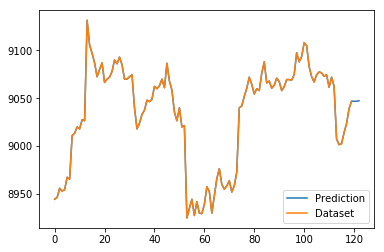

In [13]:
import matplotlib.pyplot as plt
import numpy as np

predict_plot = np.empty((prediction_dataset.shape[0], dataset.shape[1]))
predict_plot[:, :] = np.nan
predict_plot[:, :] = scaler.inverse_transform(prediction_dataset)

plt.plot(predict_plot, label='Prediction')
plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.legend()
plt.show()